## Loading the importent libraries

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

In [77]:
# Import the data
data_train = pd.read_csv(r"D:\Master\3_Semester\FreeLancing\breast-cancer_train.csv")
data_test = pd.read_csv(r"D:\Master\3_Semester\FreeLancing\breast-cancer_test.csv")

In [6]:
data_train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,15.46,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,...,18.79,17.04,125.00,1102.0,0.15310,0.3583,0.5830,0.18270,0.3216,0.10100
1,1,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,...,14.40,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151
2,-1,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,...,26.14,28.14,170.10,2145.0,0.16240,0.3511,0.3879,0.20910,0.3537,0.08294
3,1,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,...,14.06,24.34,92.82,607.3,0.12760,0.2506,0.2028,0.10530,0.3035,0.07661
4,1,12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,...,13.46,23.07,88.13,551.3,0.10500,0.2158,0.1904,0.07625,0.2685,0.07764


In [7]:
# We can see that the data are completet and don't have missing values.
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                381 non-null    int64  
 1   radius_mean              381 non-null    float64
 2   texture_mean             381 non-null    float64
 3   perimeter_mean           381 non-null    float64
 4   area_mean                381 non-null    float64
 5   smoothness_mean          381 non-null    float64
 6   compactness_mean         381 non-null    float64
 7   concavity_mean           381 non-null    float64
 8   concave points_mean      381 non-null    float64
 9   symmetry_mean            381 non-null    float64
 10  fractal_dimension_mean   381 non-null    float64
 11  radius_se                381 non-null    float64
 12  texture_se               381 non-null    float64
 13  perimeter_se             381 non-null    float64
 14  area_se                  3

In [8]:
# We make sure that there is no Null 
data_train.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# We can see with describe function, how the count, mean, std, min, max of each column in the datafram. 
data_train.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,...,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.238845,14.186228,19.212257,92.339528,661.752231,0.096037,0.103647,0.089002,0.048827,0.180473,...,16.306315,25.552546,107.505144,885.517585,0.131785,0.249475,0.269983,0.114171,0.288803,0.083535
std,0.972335,3.584529,4.246314,24.632118,364.505809,0.013813,0.051717,0.079022,0.038242,0.027135,...,4.866561,6.045839,33.572388,579.691908,0.023170,0.150723,0.199458,0.064948,0.063343,0.017678
min,-1.000000,7.691000,9.710000,48.340000,170.400000,0.062510,0.019380,0.000000,0.000000,0.116700,...,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,-1.000000,11.710000,16.170000,75.540000,421.000000,0.085460,0.063300,0.029560,0.020370,0.161500,...,13.060000,21.100000,84.460000,517.800000,0.114300,0.141500,0.111700,0.063350,0.247300,0.071130
50%,1.000000,13.200000,18.830000,85.630000,538.900000,0.094630,0.091590,0.061810,0.033840,0.178800,...,14.910000,25.210000,97.660000,683.400000,0.131100,0.208900,0.226000,0.098510,0.280600,0.080090
75%,1.000000,16.130000,21.570000,106.600000,800.000000,0.104600,0.130600,0.131900,0.075070,0.195700,...,18.790000,29.430000,125.900000,1084.000000,0.146400,0.341600,0.387900,0.161400,0.316800,0.091580
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,0.903400,0.275600,0.663800,0.173000


In [10]:
# We see that in the training dataset, 236 people has breast cancer and 145 didn*t
# We can say that the data are impalanced
data_train.groupby("diagnosis").size()

diagnosis
-1    145
 1    236
dtype: int64

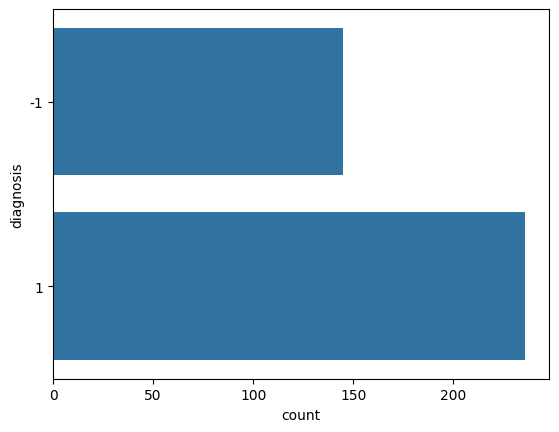

In [43]:
# We can see here the distribution of the diagnosis column.
#sns.displot(data_train["diagnosis"])

sns.countplot(y="diagnosis", data=data_train, )
plt.show()

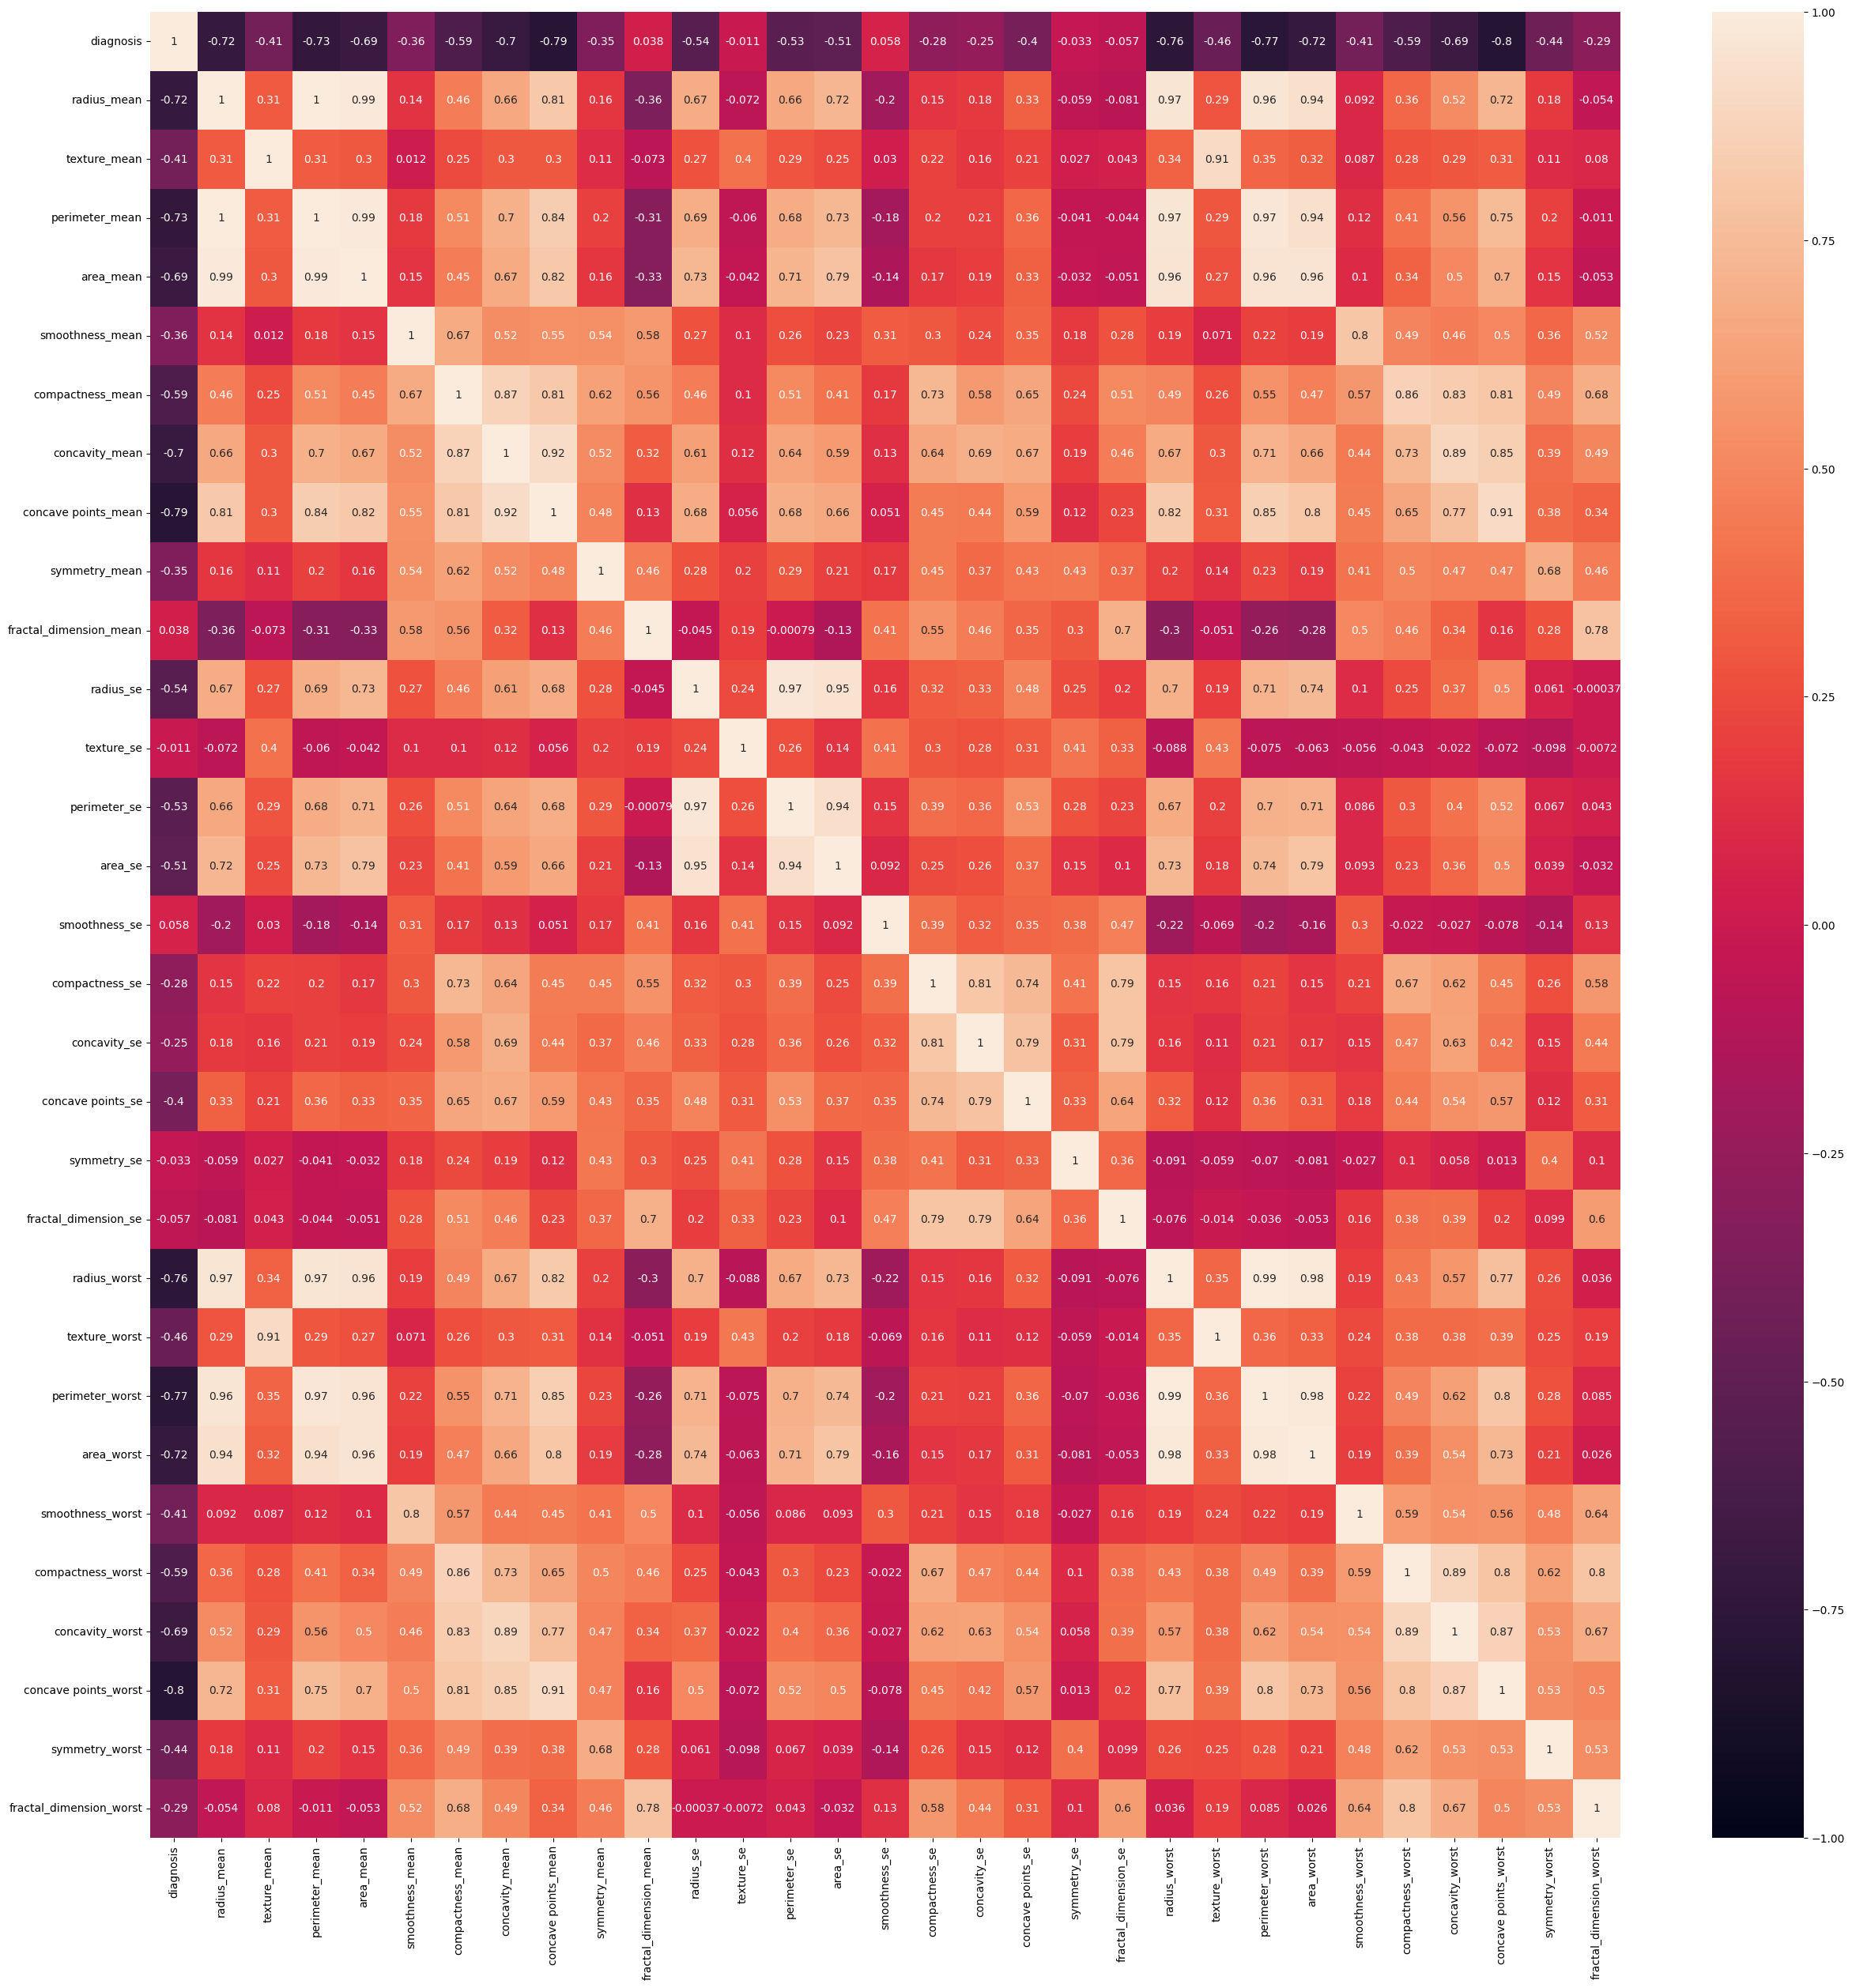

In [29]:
# we can see the correlaction in the correlation matrix for all feature togather.
plt.figure(figsize=(30, 30))
sns.heatmap(data_train.corr(), vmin=-1, vmax=1, annot=True)
#corr.loc[np.where(corr>0.8, 1, 0)==1].columns
plt.show()

In [25]:
data_train_radius_min = data_train[["radius_mean", "texture_mean"]].min()
data_train_radius_max = data_train[["radius_mean", "texture_mean"]].max()
print("Min values for radius and texture: \n", data_train_radius_min)
print("Max values for radius and texture: \n", data_train_radius_max)

Min values for radius and texture: 
 radius_mean     7.691
texture_mean    9.710
dtype: float64
Max values for radius and texture: 
 radius_mean     28.11
texture_mean    39.28
dtype: float64


<Axes: xlabel='radius_mean', ylabel='Count'>

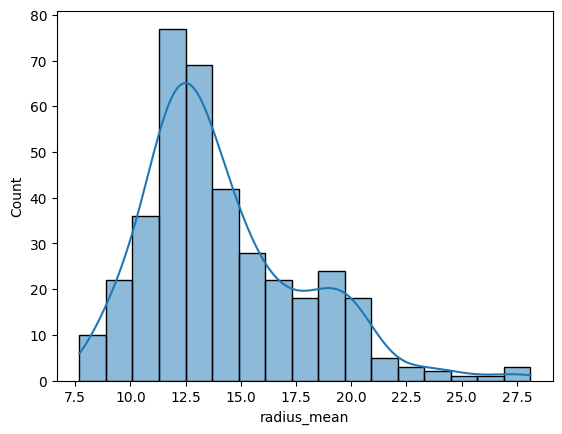

In [60]:
sns.histplot(data=data_train, x="radius_mean", kde=True)

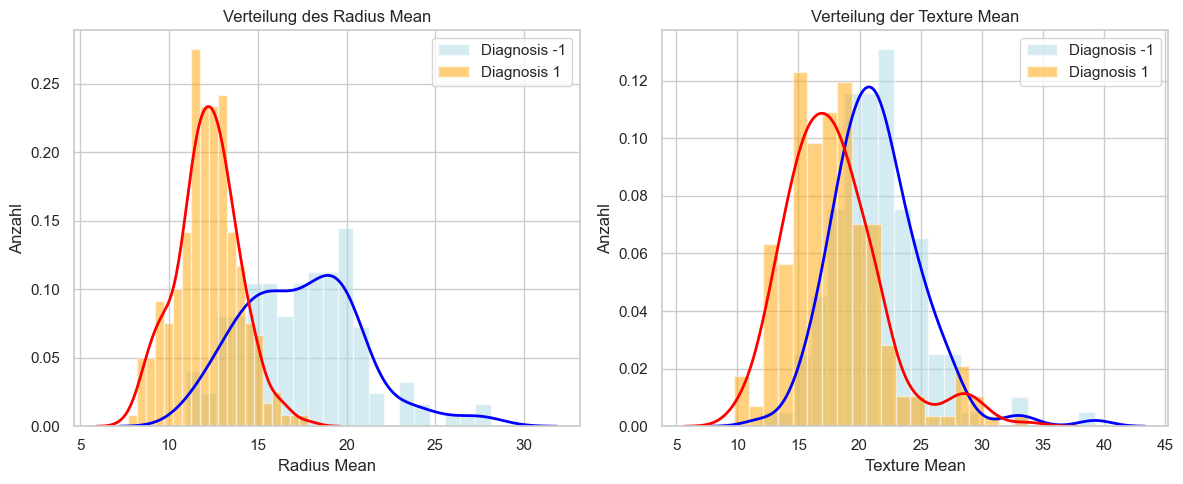

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_train_neg1 = data_train[data_train["diagnosis"] == -1]
data_train_pos1 = data_train[data_train["diagnosis"] ==  1]

# Plot erstellen
plt.figure(figsize=(12, 5))

# Histogramm für Radius Mean
plt.subplot(1, 2, 1)
# Histogramme
plt.hist(data_train_neg1["radius_mean"], bins=20, alpha=0.5, color='lightblue', label='Diagnosis -1', density=True)
plt.hist(data_train_pos1["radius_mean"], bins=20, alpha=0.5, color='orange', label='Diagnosis 1', density=True)
# Dichtekurven
sns.kdeplot(data_train_neg1["radius_mean"], color='blue', linewidth=2)
sns.kdeplot(data_train_pos1["radius_mean"], color='red', linewidth=2)
plt.title('Verteilung des Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Anzahl')
plt.legend()

# Histogramm für Texture Mean
plt.subplot(1, 2, 2)
# Histogramme
plt.hist(data_train_neg1["texture_mean"], bins=20, alpha=0.5, color='lightblue', label='Diagnosis -1', density=True)
plt.hist(data_train_pos1["texture_mean"], bins=20, alpha=0.5, color='orange', label='Diagnosis 1', density=True)
# Dichtekurven
sns.kdeplot(data_train_neg1["texture_mean"], color='blue', linewidth=2)
sns.kdeplot(data_train_pos1["texture_mean"], color='red', linewidth=2)
plt.title('Verteilung der Texture Mean')
plt.xlabel('Texture Mean')
plt.ylabel('Anzahl')
plt.legend()

plt.tight_layout()
plt.show()

## We use logistic regression model to classifie our data

In [88]:
# Prepare the model
y_train = data_train["diagnosis"] # our target variable
X_train = data_train.drop(["diagnosis"], axis=1) # our predictors

In [89]:
y_test = data_test["diagnosis"] # our target variable
X_test = data_test.drop(["diagnosis"], axis=1) # our predictors

In [90]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

# X_scaled is now a numpy array with normalized data

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
lr = LogisticRegression()

# Train the model on the training data
model = lr.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = lr.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.94      0.93      0.93        67
           1       0.96      0.97      0.96       121

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188



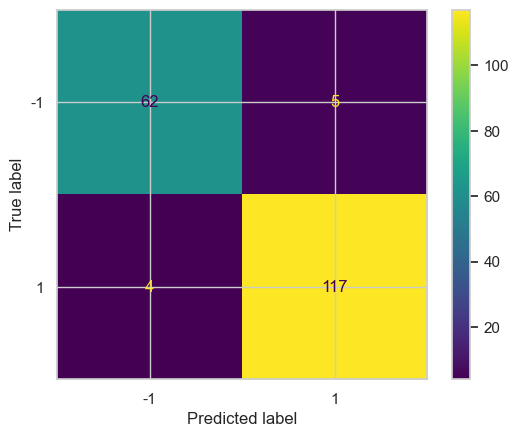

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay
C_matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)